<a href="https://colab.research.google.com/github/aboelela924/Learning-OpenCV-4-Computer-vision-with-python-3/blob/master/Learning_OpenCV_4_Computer_Vision_with_Python_3_Chapter_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np 
from scipy import ndimage
from google.colab.patches import cv2_imshow

In [ ]:
kernel_3x3 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                        [-1, 1, 2, 1, -1],
                        [-1, 2, 4, 2, -1],
                        [-1, 1, 2, 1, -1],
                        [-1, -1, -1, -1, -1]])

In [ ]:
img = cv2.imread("/content/valverde.jpg", 0)

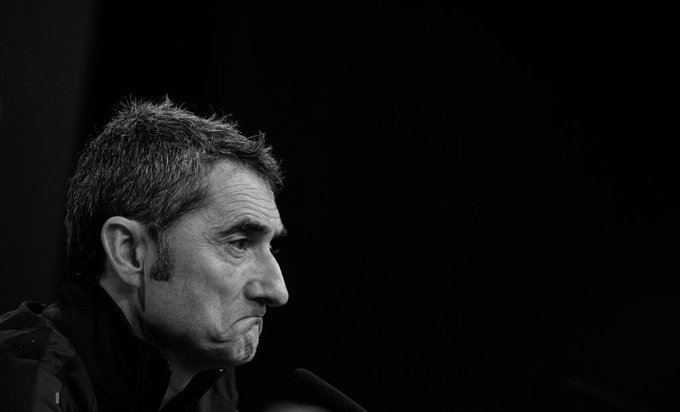

In [ ]:
cv2_imshow(img)

In [ ]:
img_filter_with_3x3 = ndimage.convolve(img, kernel_3x3)
img_filter_with_5x5 = ndimage.convolve(img, kernel_5x5)

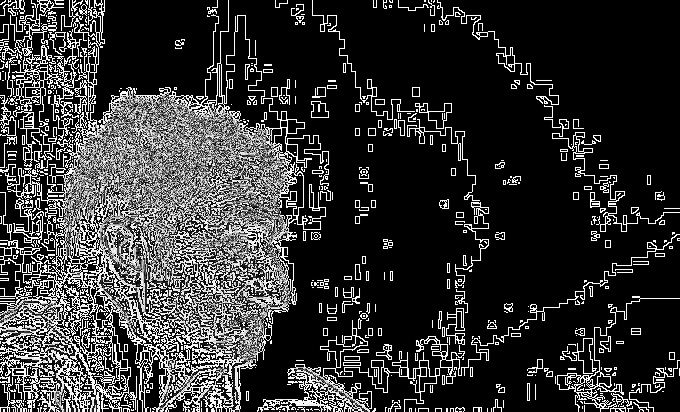

In [ ]:
cv2_imshow(img_filter_with_3x3)

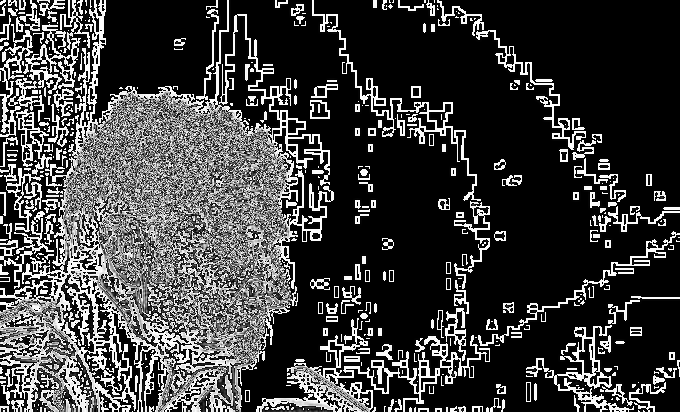

In [ ]:
cv2_imshow(img_filter_with_5x5)

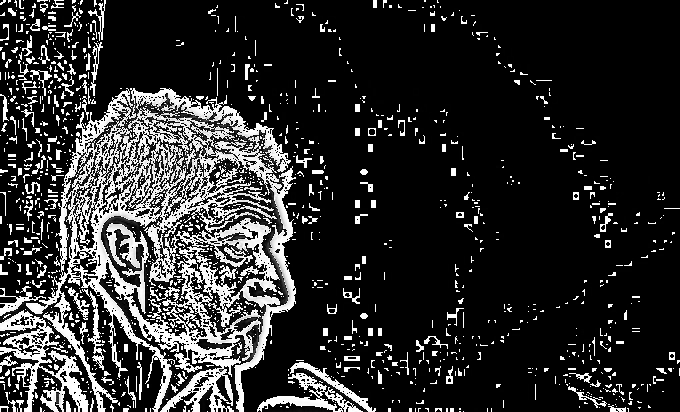

In [ ]:
img_blurred = cv2.GaussianBlur(img, (17, 17), 0)
cv2_imshow(img-img_blurred)

In [ ]:
def strokeEdges(src, dst, blurKsize = 7, edgeKsize = 5):
    if blurKsize > 3:
        blurredSrc = cv2.medianBlur(src,  blurKsize)
        graySrc = cv2.cvtColor(blurredSrc, cv2.COLOR_BGR2GRAY)
    else:
        graySrc = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    cv2.Laplacian(graySrc, cv2.CV_8U, graySrc, ksize=edgeKsize)
    normalizedInverseAlpha = (1.0 / 255) * (255 - graySrc)
    channels = cv2.split(src)
    for channel in channels:
        channel[:] = channel * normalizedInverseAlpha
    cv2.merge(channels, dst)

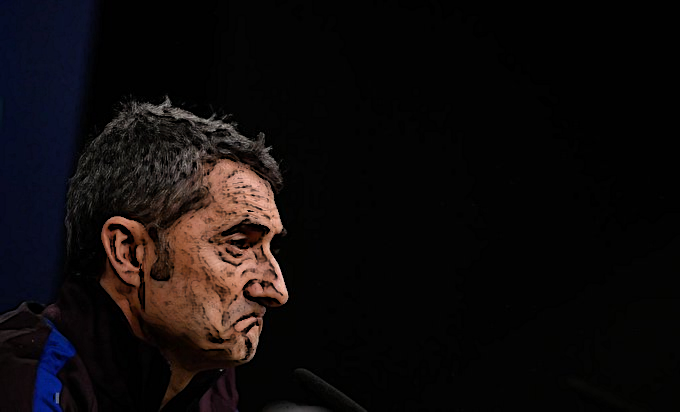

In [ ]:
valverde_bgr = cv2.imread("/content/valverde.jpg")
dst_img = np.ones_like(valverde_bgr)
strokeEdges(valverde_bgr, dst_img)
cv2_imshow(dst_img)

<h1>Filters</h1>

In [ ]:
class VConvolutionFilter(object):
    
    def __init__(self, kernel):
        self._kernel = kernel
    
    def apply(self, src, dst):
        cv2.filter2D(src, -1, self._kernel, dst)

In [ ]:
class SharpenFilter(VConvolutionFilter):
    def __init__(self):
        kernel = np.array([[-1, -1, -1],
                           [-1, 9, -1], 
                           [-1, -1, -1]])
        VConvolutionFilter.__init__(self, kernel)

In [ ]:
class FindEdgeFilter(VConvolutionFilter):
    def __init__(self):
        kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
        VConvolutionFilter.__init__(self, kernel)

In [ ]:
class BlurFilter(VConvolutionFilter):
    def __init__(self):
        kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                           [0.04, 0.04, 0.04, 0.04, 0.04],
                           [0.04, 0.04, 0.04, 0.04, 0.04],
                           [0.04, 0.04, 0.04, 0.04, 0.04],
                           [0.04, 0.04, 0.04, 0.04, 0.04]])
        VConvolutionFilter.__init__(self, kernel)

<h1>Edge detection with Canny</h1>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

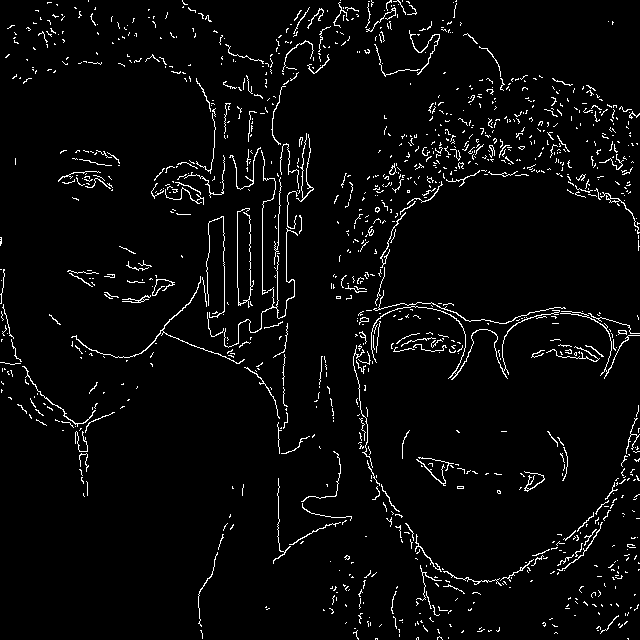

In [ ]:
img = cv2.imread("/content/Said.jpg")
cv2_imshow(cv2.Canny(img, 200, 240))

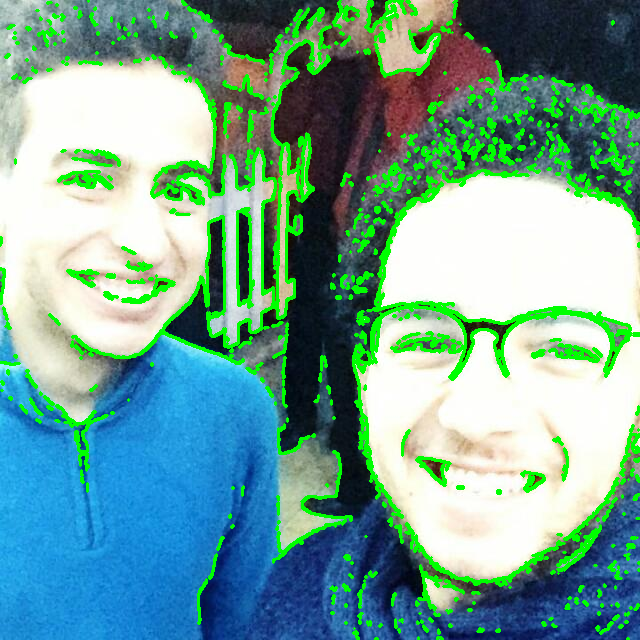

In [ ]:
img = cv2.imread("/content/Said.jpg")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgGray, 200, 240)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
new_img = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
cv2_imshow(img)

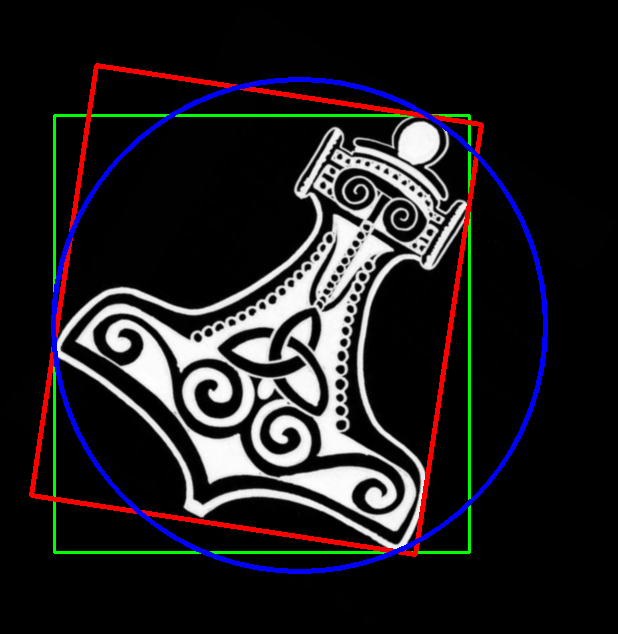

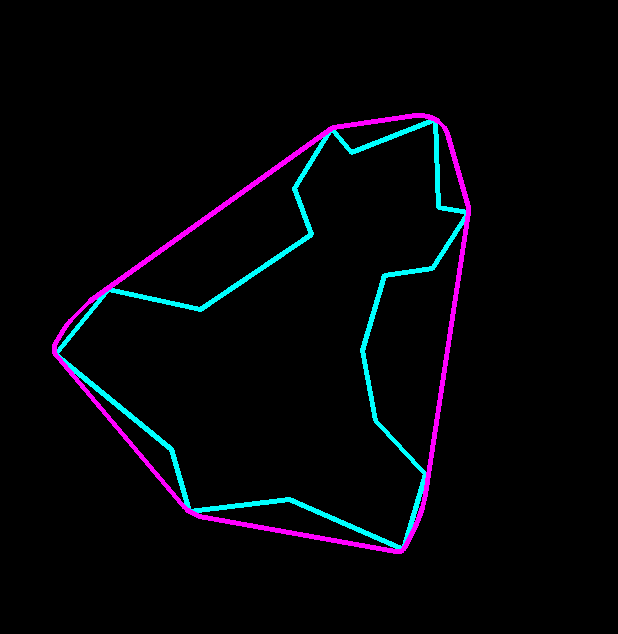

In [ ]:
img = cv2.pyrDown(cv2.imread("/content/hammer.jpg", cv2.IMREAD_UNCHANGED))
_, threshold = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
contours, hirreachy  = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

blackImage = np.zeros_like(img)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img, [box], 0, (0, 0, 255), 3)

    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img, center, radius, (255, 0, 0), 3)

    epsilon = 0.01 * cv2.arcLength(c, True)
    polyShape = cv2.approxPolyDP(c, epsilon, True)
    convexHull = cv2.convexHull(c)
    
    cv2.drawContours(blackImage, [polyShape], -1, (255, 255, 0), 3)
    cv2.drawContours(blackImage, [convexHull], -1, (255, 0, 255), 3)
cv2_imshow(img)
cv2_imshow(blackImage)

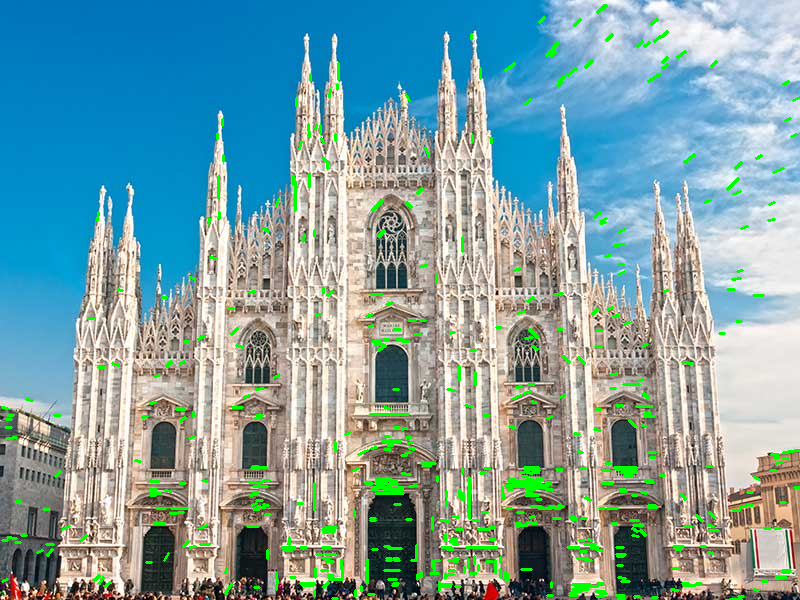

In [ ]:
img = cv2.imread("/content/lines.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 120)

maxLineLength = 20
maxLineGap = 5

lines = cv2.HoughLinesP(edges, 1, np.pi/180.0, 20, maxLineLength, maxLineGap)

for lineGroup in lines:
    for x1, y1, x2, y2, in lineGroup:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow( img)